Use the data to build a recursive bayesian filter!
==================================================

Also known as a particle filter in DA

In [74]:
# load the data
f = open("analysislogactually.txt","r")

maxread = 10 # 14738 #1000

full = zeros(Float64,100,maxread) # 14738,14738)
d = zeros(Int64,maxread,maxread)
metadata = Array{String,4}

# println(full(1,:))
i = 0

# skip the first 0 (3)
j = 0 # 3
# readline(f)
# readline(f)
# readline(f)

skipped = [Int64]

# read in as many lines as possible
while i < maxread
    line = readline(f)
    i+=1
    # stop if i've hit maxread....this conditino
    # should never be met due to the while loop
    if i > maxread
        break
    end
    
    # parse a line of the log
    # println(line)
    info = split(strip(line,'\n'),"\t")
    println(info)
    book = info[1]
    
    # this should be the filename for the book's timeseries
    filename = string("timeseries/",book,".csv")
    
    # if this file exists, load it!
    # put the timeseries into the variable timeseries
    # and set the distance matrix d
    if isfile(filename)
        g = open(filename,"r")
        # println(length(readlines(g)))
        # parse the whole file in one line here
        timeseries = map((x)->float(strip(x,'\n')),split(readline(g),","))
        close(g)
        
        # now load the distances for that book
        g = open(string("sumdistance/",book,".csv"),"r")
        distances = map((x)->int(strip(x,'\n')),readlines(g))
        # and put them into the right place, skipping the first j entries
        d[:,i] = distances[1+j:maxread+j]
        close(g)
    else
        # skip ahead if the files dont exists
        while !isfile(filename)
            # will need to remake these eventually
            # had acidentally deleted many of them
            println(filename)
            # add to the number of files that i've skipped,
            # in total
            j+=1
            line = readline(f)
            info = split(strip(line,'\n'),"\t")
            book = info[1]
            filename = string("timeseries/",book,".csv")
        end
        g = open(filename,"r")
        # println(length(readlines(g)))
        timeseries = map((x)->float(strip(x,'\n')),split(readline(g),","))
        close(g)
        g = open(string("sumdistance/",book,".csv"),"r")
        distances = map((x)->int(strip(x,'\n')),readlines(g))
        d[:,i] = distances[1+j:maxread+j]
        close(g)
        # timeseries = zeros(Float64,100)
    end
    # distances = readlines(g)
    # println(length(distances))
    # println(distances[1:10])
    # println(typeof(distances[1]))
    full[:,i] = timeseries
    
end

SubString{ASCIIString}["12006","A Handbook to Agra and the Taj","E. B. Havell","English"]
SubString{ASCIIString}["1200","Gargantua and Pantagruel, Complete.","Francois Rabelais","English"]
SubString{ASCIIString}["12011","Monsieur Parent","Guy de Maupassant","French"]
SubString{ASCIIString}["12012","Drei Gaugoettinnen","E. L. Rochholz","German"]
SubString{ASCIIString}["12013","My Year of the War","Frederick Palmer","English"]
SubString{ASCIIString}["12014","The Lives of the Poets of Great Britain and Ireland (1753)","Theophilus Cibber","English"]
SubString{ASCIIString}["12015","Love Under Fire","Randall Parrish","English"]
SubString{ASCIIString}["12016","The Merchant of Berlin","L Muehlbach","English"]
SubString{ASCIIString}["12019","Queen Hortense","L. Muehlbach","English"]
SubString{ASCIIString}["12020","A Woman of the World","Ella Wheeler Wilcox","English"]


In [77]:
# full
# d[1:100,1:100]
# make the distance to self really big
for i in 1:length(d[:,1])
    d[i,i] = 0
end
d

10x10 Array{Int64,2}:
    0  1176   789  1092  1077  1149  1221  1847  1015  1050
 1176     0   889   720   513   515   551   843   611   550
  789   889     0   647   560   690   928  1500   668   761
 1092   720   647     0   643   605   713  1393   339   908
 1077   513   560   643     0   356   622   970   534   573
 1149   515   690   605   356     0   594   964   554   669
 1221   551   928   713   622   594     0   912   622   697
 1847   843  1500  1393   970   964   912     0  1308   837
 1015   611   668   339   534   554   622  1308     0   775
 1050   550   761   908   573   669   697   837   775     0

In [9]:
using PyPlot
PyPlot.svg(true)
import PyPlot.plt

INFO: Loading help data...


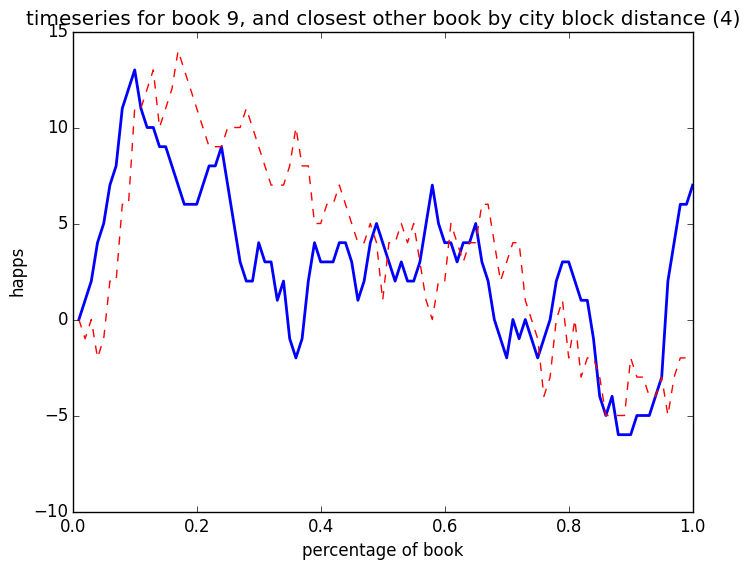

In [89]:
randBookNum = rand(1:maxread)
# slice the distances here
# randBookNum = 9
minval,minindex = findmin([d[randBookNum,1:randBookNum-1] d[randBookNum,randBookNum+1:end]])
if minindex > randBookNum
    minindex += 1
end
# plt.subplot(3,1,1)
plt.plot(.01:.01:1,full[:,randBookNum],linewidth=2.0,"b-")
plt.plot(.01:.01:1,full[:,minindex],linewidth=1.0,"r--")
plt.title("timeseries for book $randBookNum, and closest other book by city block distance ($minindex)")
plt.ylabel("happs")
plt.xlabel("percentage of book")
plt.savefig("$(randBookNum)-timeseries-w-most-similar.png")

In [91]:
full

100x10 Array{Float64,2}:
  0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0   0.0
  0.0   1.0   0.0  -1.0  -1.0  -5.0    0.0   -1.0   1.0  -1.0
  0.0   1.0   0.0   0.0  -1.0  -6.0    0.0   -2.0   2.0   3.0
  0.0   2.0   1.0  -2.0   0.0  -4.0    1.0   -3.0   4.0   1.0
  0.0   1.0   1.0  -1.0   0.0  -1.0    1.0   -4.0   5.0   0.0
  0.0   3.0   1.0   2.0   2.0  -1.0    1.0   -8.0   7.0   1.0
  0.0   3.0   1.0   2.0   0.0  -2.0    2.0  -11.0   8.0  -2.0
 -1.0   5.0   1.0   6.0  -3.0  -3.0    1.0  -15.0  11.0  -3.0
  0.0   5.0   1.0   6.0  -5.0  -5.0    1.0  -18.0  12.0  -4.0
  0.0   3.0   0.0  11.0  -1.0  -5.0    1.0  -18.0  13.0  -7.0
  0.0   3.0   0.0  11.0  -4.0  -5.0    1.0  -19.0  11.0  -7.0
 -1.0  -3.0   2.0  12.0  -4.0  -6.0    1.0  -19.0  10.0  -6.0
 -2.0  -3.0   2.0  13.0  -3.0  -2.0    1.0  -19.0  10.0  -7.0
  ⋮                             ⋮                            
 15.0  -4.0  10.0  -5.0   1.0  -7.0  -12.0   -9.0  -6.0   5.0
 15.0  -7.0   9.0  -2.0  -1.0  -5.0  -13.0   

In [36]:
d[randBookNum,:]

1x1000 Array{Int64,2}:
 1077  720  798  838  462  986  524  …  492  524  624  664  456  1234  557

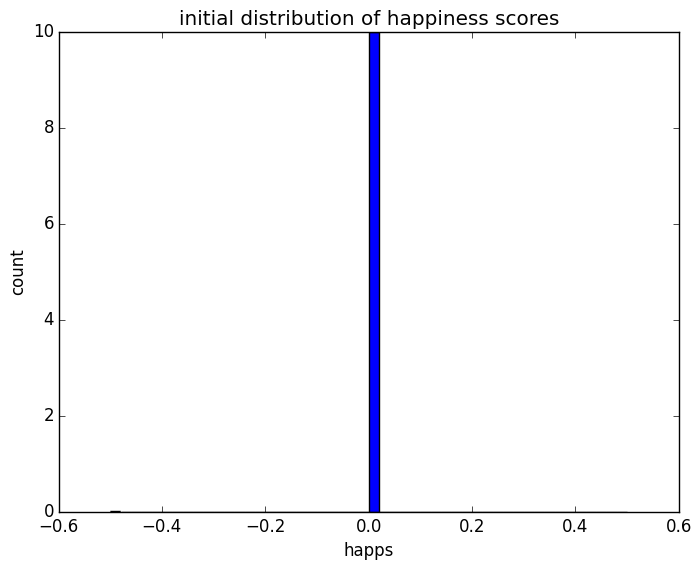

In [90]:
# plot the distribution of scores at time 0
t = 0
nbins = 50
e,counts = hist(full[t+1,:]',nbins)
bins = [e[i]/2+e[i+1]/2 for i in 1:length(e)-1]
plt.hist(full[t+1,:]',normed=false,bins=nbins)
plt.title("initial distribution of happiness scores")
plt.xlabel("happs")
plt.ylabel("count")
plt.savefig("initial-happs-dist.png")

In [92]:
# observation operator
function H(x)
    mean(x)
end

H (generic function with 1 method)

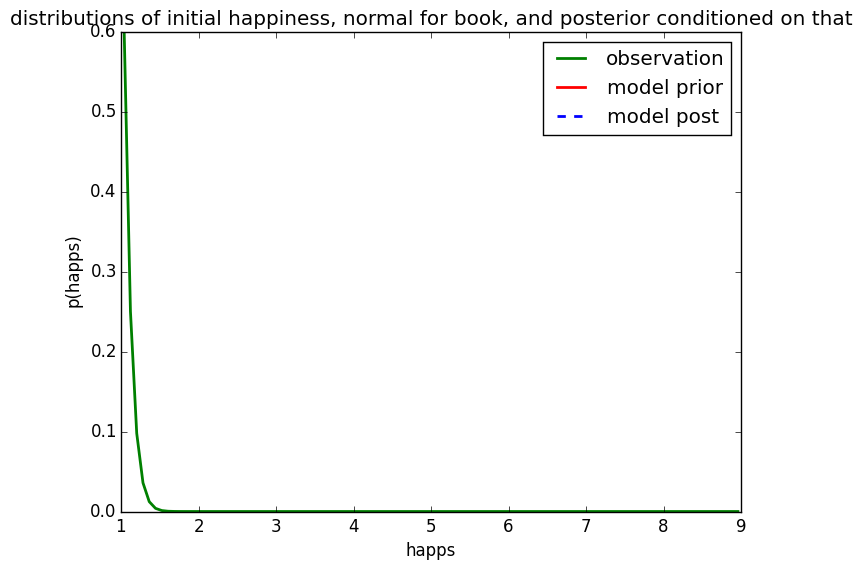

PyObject <matplotlib.text.Text object at 0x11d119290>

In [93]:
# given the first observation, and error covariance
y = full[:,2]
R = .1
# make a prediction for the second step
# first, to compute the posterior, we need the prior ditribution
# discretize in happs
nbins = 100
bins = 1.0:(9.0-1.0)/(nbins-1):9.0
e,counts = hist(full[1,:]',bins)
bincenters = Float64[e[i]/2+e[i+1]/2 for i in 1:length(e)-1]
# normalize
prior = counts/sum(counts)
# likelihood of the observation given the model
p_obs = exp(-0.5*(bincenters-y[1]).^2/R)/sum(exp(-0.5*(bincenters-y[1]).^2/R))
obs_likelihood = exp(-0.5*(y[1]-H(full[:,1]))'*(1/R)*(y[1]-H(full[:,1])))
obs_likelihood_dist = exp(-0.5*(p_obs-prior).^2*(1/R))
# normalization of bayes rule
# p_d = sum(prior*obs_likelihood)
# posterior = prior.*obs_likelihood/sum(prior.*obs_likelihood)
posterior = prior.*p_obs/sum(prior.*p_obs)
plt.plot(bincenters,p_obs,"g-",linewidth=2.0)
plt.plot(bincenters,prior,"r-",linewidth=2.0)
plt.plot(bincenters,posterior,"b--",linewidth=2.0)
plt.legend(["observation","model prior","model post"])
plt.xlabel("happs")
plt.ylabel("p(happs)")
plt.title("distributions of initial happiness, normal for book, and posterior conditioned on that")

In [94]:
# weight all of the models by their contribution to the posterior
# monte carlo style
function findbin(x,bins)
    i = 1
    while x > bins[i+1]
        i+=1
    end
    i
end
weight = Float64[1/length(full[1,:]) for i in 1:length(full[1,:])]
new_weight = Float64[weight[i]*posterior[findbin(full[1,i],bins)] for i in 1:length(full[1,:])]
# normalize the new weights

10-element Array{Float64,1}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [95]:
plt.hist(new_weight,normed=false,bins=50)
plt.ylabel("count")
plt.xlabel("weight")
plt.title("initial weights for each particle")

LoadError: PyError (PyObject_Call) <type 'exceptions.AttributeError'>
AttributeError('max must be larger than min in range parameter.',)
  File "/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py", line 2890, in hist
    stacked=stacked, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 5636, in hist
    m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)
  File "/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py", line 176, in histogram
    'max must be larger than min in range parameter.')

while loading In[95], in expression starting on line 1

In [11]:
findmax(new_weight)

(0.00011226994424010282,4)

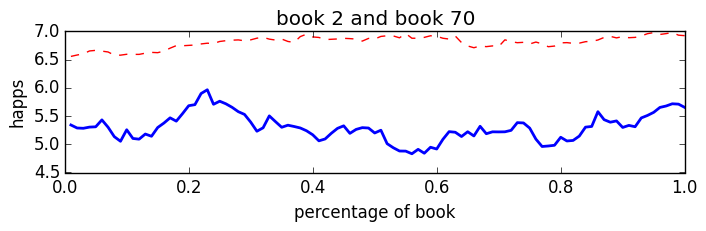

PyObject <matplotlib.text.Text object at 0x11daecb10>

In [12]:
plt.subplot(3,1,1)
plt.plot(.01:.01:1,full[:,2],linewidth=2.0,"b-")
plt.ylabel("happs")
plt.xlabel("percentage of book")
plt.plot(.01:.01:1,full[:,70],linewidth=1.0,"r--")
plt.title("book 2 and book 70")

In [13]:
println(y[2])
println(sum(new_weight.*full[2,:]'))

5.28789
0.1467585863914925


In [14]:
# weight the particles by the sum of their contribution to the past _x_ observations
# with coefficients decaying exponentially in time (local structure more informat)

function decayfun(t)
    # return the decay to t timesteps back
    # exponential decay
    k = 0.2
    exp(-k*t)
end

# decayfun(10)
# decayfun(20)
# decayfun(30)

y = full[:,2]
R = .05

# same discretization from above
nbins = 100
bins = 1.0:(9.0-1.0)/(nbins-1):9.0
e,counts = hist(full[1,:]',bins)
bincenters = Float64[e[i]/2+e[i+1]/2 for i in 1:length(e)-1]
# normalize
prior = counts/sum(counts)
# likelihood of the observation given the model
p_obs = exp(-0.5*(bincenters-y[1]).^2/R)/sum(exp(-0.5*(bincenters-y[1]).^2/R))
# sample from the prior to build p_obs
weight = Float64[1/length(full[1,:]) for i in 1:length(full[1,:])]
# resample
new_weight = Float64[p_obs[findbin(full[1,i],bins)]/counts[findbin(full[1,i],bins)] for i in 1:length(full[1,:])]
# findmax(new_weight)
# new_weight[findmax(new_weight)[2]]
# findbin(full[1,findmax(new_weight)[2]],bins)
# p_obs[56]
# counts[56]
# p_obs[56]/counts[56]

TOL = 10e-6
if abs(1-sum(new_weight)) > TOL
    println("sampled distribution sum not within TOL of 1, its $(sum(new_weight))")
end
if abs(sum(new_weight.*full[1,:]')-y[1]) > TOL
    println("mean of the distribution is not within TOL, it's $(sum(new_weight.*full[1,:]')) and the initial observation is $(y[1])")
end

sampled distribution sum not within TOL of 1, its 0.9999898214153109
mean of the distribution is not within TOL, it's 5.34470775073926 and the initial observation is 5.3416


prediction to time 10 is 5.53022047953879, actual timeseries does 5.25688


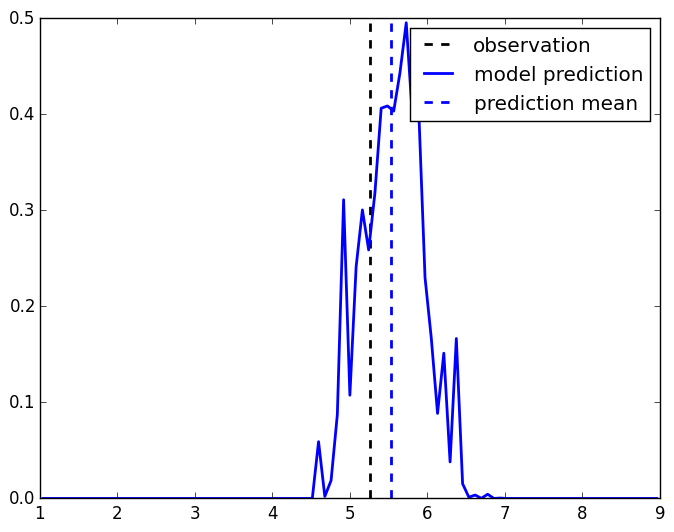

PyObject <matplotlib.legend.Legend object at 0x11de13650>

In [15]:
# advance the particles (one step for now)
weight = copy(new_weight)
t = 10
f = sum(weight.*full[t,:]')
println("prediction to time $(t) is $(f), actual timeseries does $(y[t])")

posterior = zeros(Float64,length(bincenters))
for i in 1:length(weight)
    posterior[findbin(full[t,i],bins)] += full[t,i]*weight[i]
end

plt.plot([y[t],y[t]],[0,maximum(posterior)],"k--",linewidth=2.0)
plt.plot(bincenters,posterior,"b-",linewidth=2.0)
plt.plot([f,f],[0,maximum(posterior)],"b--",linewidth=2.0)
plt.legend(["observation","model prediction","prediction mean"])

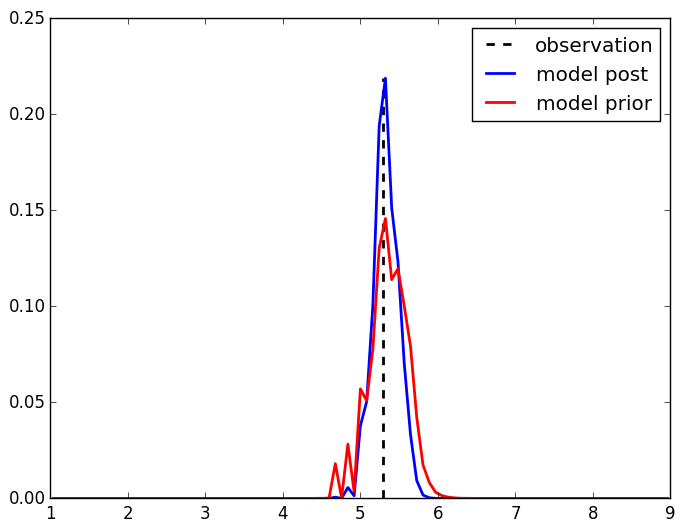

PyObject <matplotlib.legend.Legend object at 0x11e055e50>

In [16]:
# update the weights based on bayes rule
# we're not very worried about filter divergence (it should converge on itself)
t = 2
p_obs = exp(-0.5*(bincenters-y[2]).^2/R)/sum(exp(-0.5*(bincenters-y[2]).^2/R))
prior = zeros(Float64,length(bincenters))
for i in 1:length(weight)
    prior[findbin(full[t,i],bins)] += full[t,i]*weight[i]
end
prior = prior./sum(prior)
post = p_obs.*prior
# normalize
post = post./sum(post)

plt.plot([y[t],y[t]],[0,maximum(post)],"k--",linewidth=2.0)
plt.plot(bincenters,post,"b-",linewidth=2.0)
plt.plot(bincenters,prior,"r-",linewidth=2.0)
plt.legend(["observation","model post","model prior"])

max weight is now 0.013678678896172419)


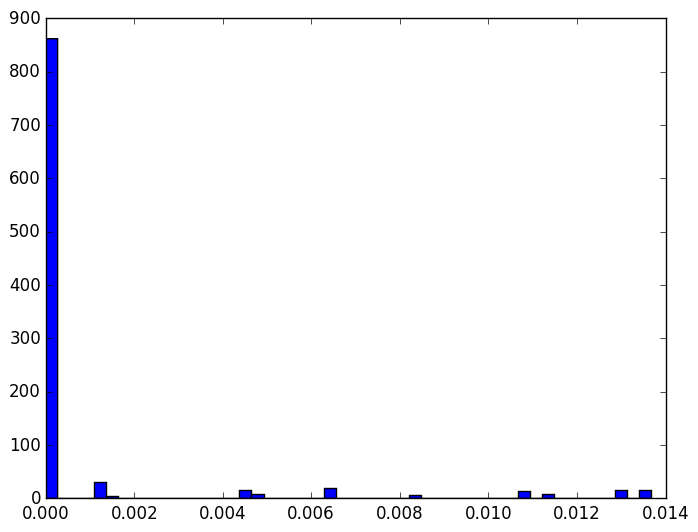

([862.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0.0  …  0.0,9.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,16.0],[1.25787e-35,0.000273574,0.000547147,0.000820721,0.00109429,0.00136787,0.00164144,0.00191502,0.00218859,0.00246216  …  0.0112165,0.0114901,0.0117637,0.0120372,0.0123108,0.0125844,0.012858,0.0131315,0.0134051,0.0136787],{PyObject <matplotlib.patches.Rectangle object at 0x11e29a9d0>,PyObject <matplotlib.patches.Rectangle object at 0x11e29ae90>,PyObject <matplotlib.patches.Rectangle object at 0x11e2a76d0>,PyObject <matplotlib.patches.Rectangle object at 0x11e2a7d50>,PyObject <matplotlib.patches.Rectangle object at 0x11e2b5410>,PyObject <matplotlib.patches.Rectangle object at 0x11e2b5a90>,PyObject <matplotlib.patches.Rectangle object at 0x11e2b5f90>,PyObject <matplotlib.patches.Rectangle object at 0x11e2c27d0>,PyObject <matplotlib.patches.Rectangle object at 0x11e2c2e50>,PyObject <matplotlib.patches.Rectangle object at 0x11e2d0510>  …  PyObject <matplotlib.patches.Rectangle object at 0x11e35b750>,Py

In [17]:
# resample
e,counts = hist(full[t,:]',bins)
new_weight = Float64[post[findbin(full[t,i],bins)]/counts[findbin(full[t,i],bins)] for i in 1:length(full[t,:])]
println("max weight is now $(maximum(new_weight)))")
plt.hist(new_weight,normed=false,bins=50)

In [18]:
n = 2
y = full[:,n]
R = .05

# same discretization from above
nbins = 100
bins = 1.0:(9.0-1.0)/(nbins-1):9.0

t=1

e,counts = hist(full[t,:]',bins)
bincenters = Float64[e[i]/2+e[i+1]/2 for i in 1:length(e)-1]
# normalize
prior = counts/sum(counts)
# likelihood of the observation given the model
p_obs = exp(-0.5*(bincenters-y[t]).^2/R)/sum(exp(-0.5*(bincenters-y[t]).^2/R))
# sample from the prior to build p_obs
weight = Float64[1/length(full[t,:]) for i in 1:length(full[t,:])]
# resample
new_weight = Float64[p_obs[findbin(full[t,i],bins)]/counts[findbin(full[t,i],bins)] for i in 1:length(full[t,:])]

predictions = zeros(Float64,100)
f = sum(weight.*full[t,:]')
predictions[t] = f
# now run the filter halfway
for t=2:50
    weight = copy(new_weight)
    f = sum(weight.*full[t,:]')
    # println("prediction to time $(t) is $(f), actual timeseries does $(y[t])")
    predictions[t] = f
    
    for i in 1:length(weight)
        prior[findbin(full[t,i],bins)] += full[t,i]*weight[i]
    end
    prior = prior./sum(prior)
    post = p_obs.*prior
    # normalize
    post = post./sum(post)
    
    p_obs = exp(-0.5*(bincenters-y[t]).^2/R)/sum(exp(-0.5*(bincenters-y[t]).^2/R))
    prior = zeros(Float64,length(bincenters))
    
    e,counts = hist(full[t,:]',bins)
    new_weight = Float64[post[findbin(full[t,i],bins)]/counts[findbin(full[t,i],bins)] for i in 1:length(full[t,:])]
    # println("max weight is now $(maximum(new_weight)))")
end
weight = copy(new_weight)
for t=51:100
    f = sum(weight.*full[t,:]')
    predictions[t] = f
end
weight = copy(new_weight)
f = sum(weight.*full[t,:]')
println("prediction to time $(t) is $(f), actual timeseries does $(y[t])")

prediction to time 100 is 5.6056580197863415, actual timeseries does 5.65309


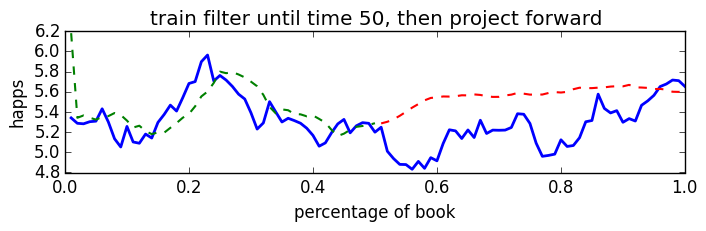

PyObject <matplotlib.text.Text object at 0x11e5b7f50>

In [19]:
plt.subplot(3,1,1)
plt.plot(.01:.01:1,y,linewidth=2.0,"b-")
plt.ylabel("happs")
plt.xlabel("percentage of book")
plt.plot(.01:.01:.5,predictions[1:50],linewidth=1.5,"g--")
plt.plot(.51:.01:1,predictions[51:100],linewidth=1.5,"r--")
plt.title("train filter until time 50, then project forward")

In [2]:
# write the above predictor as a function
function predict(n,trainLen)
    y = full[:,n]
    R = .05

    # same discretization from above
    nbins = 100
    bins = 1.0:(9.0-1.0)/(nbins-1):9.0

    t=1
    e,counts = hist(full[t,:]',bins)
    bincenters = Float64[e[i]/2+e[i+1]/2 for i in 1:length(e)-1]
    # normalize
    prior = counts/sum(counts)
    # likelihood of the observation given the model
    p_obs = exp(-0.5*(bincenters-y[t]).^2/R)/sum(exp(-0.5*(bincenters-y[t]).^2/R))
    # sample from the prior to build p_obs
    weight = Float64[1/length(full[t,:]) for i in 1:length(full[t,:])]
    # resample
    new_weight = Float64[p_obs[findbin(full[t,i],bins)]/counts[findbin(full[t,i],bins)] for i in 1:length(full[t,:])]

    predictions = zeros(Float64,100)
    f = sum(weight.*full[t,:]')
    predictions[t] = f
    # now run the filter halfway
    for t=2:trainLen
        weight = copy(new_weight)
        f = sum(weight.*full[t,:]')
        # println("prediction to time $(t) is $(f), actual timeseries does $(y[t])")
        predictions[t] = f
    
        for i in 1:length(weight)
            prior[findbin(full[t,i],bins)] += full[t,i]*weight[i]
        end
        prior = prior./sum(prior)
        post = p_obs.*prior
        # normalize
        post = post./sum(post)
    
        p_obs = exp(-0.5*(bincenters-y[t]).^2/R)/sum(exp(-0.5*(bincenters-y[t]).^2/R))
        prior = zeros(Float64,length(bincenters))
        
        e,counts = hist(full[t,:]',bins)
        new_weight = Float64[post[findbin(full[t,i],bins)]/counts[findbin(full[t,i],bins)] for i in 1:length(full[t,:])]
        # println("max weight is now $(maximum(new_weight)))")
    end
    weight = copy(new_weight)
    for t=trainLen+1:100
        f = sum(weight.*full[t,:]')
        predictions[t] = f
    end
    weight = copy(new_weight)
    f = sum(weight.*full[t,:]')
    println("prediction to time $(t) is $(f), actual timeseries does $(y[t])")
    predictions
end

predict (generic function with 1 method)

In [5]:
predictfrom50 = zeros(Float64,100,maxread)
all_error = zeros(Float64,100,maxread)
for i=1:maxread
    predictfrom50[:,i] = predict(i,50)
    all_error = full[:,i] - predictfrom50[:,i]
end

prediction to time 100 is 5.903543291721057, actual timeseries does 5.2992
prediction to time 100 is 5.6056580197863415, actual timeseries does 5.65309
prediction to time 100 is 6.040120923835691, actual timeseries does 6.33857
prediction to time 100 is 5.990130844233153, actual timeseries does 4.45503
prediction to time 100 is 5.935929993780723, actual timeseries does 6.01199
prediction to time 100 is 6.128990344922255, actual timeseries does 6.48497
prediction to time 100 is 6.356097572312282, actual timeseries does 6.10442
prediction to time 100 is 5.989166318122882, actual timeseries does 5.38129
prediction to time 100 is 5.994825790737718, actual timeseries does 5.77949
prediction to time 100 is 5.113067879390101, actual timeseries does 4.4329
prediction to time 100 is 5.93800831870801, actual timeseries does 5.73588
prediction to time 100 is 5.789165915000231, actual timeseries does 5.93826
prediction to time 100 is 6.232859150225827, actual timeseries does 6.26071
prediction to 

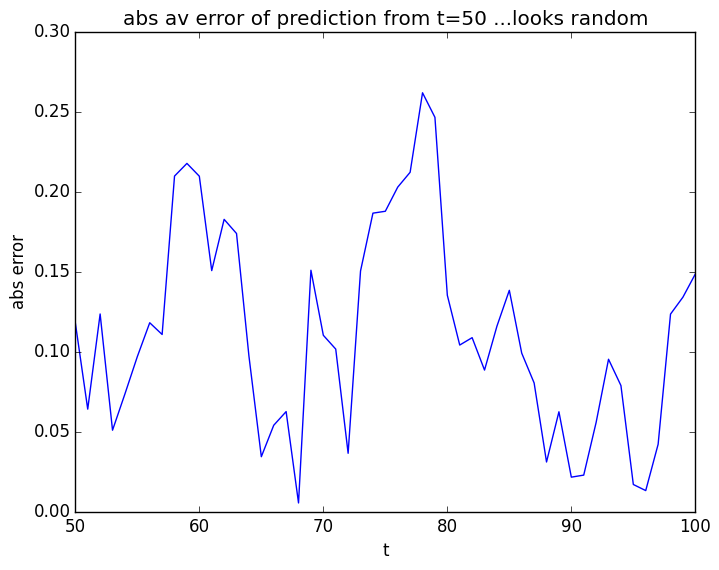

PyObject <matplotlib.text.Text object at 0x11b5e1990>

In [19]:
av_error = mean(all_error,2)
plt.plot(50:100,abs(av_error[50:100]),linewidth=2)
plt.title("abs av error of prediction from t=50 ...looks random")
plt.ylabel("abs error")
plt.xlabel("t")